<a href="https://colab.research.google.com/github/obagregory/felix/blob/master/Final_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

Disabled warnings in Python!,this will help keep your output cleaner by suppressing warning messages.

In [4]:
# Re-attempting to load the latest uploaded file to ensure we have the correct data.
file_path = 'houseprice.csv'
house = pd.read_csv(file_path)


# Display the first few rows to verify successful loading
house.head()



,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,$260/sqft,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021"
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,$140/sqft,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228"
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,$36/sqft,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211"
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,$677/sqft,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,$190/sqft,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169"


In [5]:
house.columns

Index(['Price', 'Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath',
       'Year Built', 'Price Sqr Ft', 'Last Sold Year', 'Last Sold For',
       'Address', 'City', 'State', 'Zipcode', 'Address Full'],
      dtype='object')

In [6]:
# Ensure all columns are treated as strings initially to avoid issues with NaN values
house['Price'] = house['Price'].astype(str)
house['Lot Size'] = house['Lot Size'].astype(str)
house['Sqr Ft'] = house['Sqr Ft'].astype(str)
house['Price Sqr Ft'] = house['Price Sqr Ft'].astype(str)
house['Last Sold For'] = house['Last Sold For'].astype(str)

# Remove $, sqft, and acre from relevant columns
house['Price'] = house['Price'].str.replace('[$, nn]', '', regex=True)
house['Lot Size'] = house['Lot Size'].str.replace('[$, acre, sqft, nn]', '', regex=True)
house['Sqr Ft'] = house['Sqr Ft'].str.replace('[, sqft]', '', regex=True)
house['Price Sqr Ft'] = house['Price Sqr Ft'].str.replace('[$, /sqft, nn]', '', regex=True)
house['Last Sold For'] = house['Last Sold For'].str.replace('[$, nn]', '', regex=True)

# Convert to float
house['Price'] = pd.to_numeric(house['Price'], errors='coerce')
house['Last Sold For'] = pd.to_numeric(house['Last Sold For'], errors='coerce')
house['Lot Size'] = pd.to_numeric(house['Lot Size'], errors='coerce')
house['Sqr Ft'] = pd.to_numeric(house['Sqr Ft'], errors='coerce')
house['Price Sqr Ft'] = pd.to_numeric(house['Price Sqr Ft'], errors='coerce')



The code above ensure all columns are treated as strings initially to avoid issues with NaN values and then removes the $, sqft, and acre from relevant columns and later on converting the (Price, Sqr Ft,Lot Size,Price Sqr Ft and Last Sold For) to float.

In [7]:
house.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,895900.0,3447.0,-112.081985,33.560055,7895.0,4.0,4.5,2019.0,260.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021"
1,247000.0,1767.0,-96.676250,32.829227,7877.0,3.0,2.0,1954.0,140.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228"
2,44900.0,1232.0,-78.825190,42.913000,3510.0,3.0,1.0,1900.0,36.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211"
3,959000.0,1417.0,-73.860170,40.722960,2598.0,3.0,2.0,1939.0,677.0,2009.0,532000.0,"6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
4,83500.0,440.0,-80.206314,25.937965,NaN,NaN,1.0,1971.0,190.0,2007.0,52000.0,"251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169"


In [8]:
house.shape

(30006, 16)

In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           28695 non-null  float64
 1   Sqr Ft          27786 non-null  float64
 2   Longitude       30006 non-null  float64
 3   Latitude        30006 non-null  float64
 4   Lot Size        25490 non-null  float64
 5   Beds            27420 non-null  float64
 6   Bath            27496 non-null  float64
 7   Year Built      26258 non-null  float64
 8   Price Sqr Ft    27271 non-null  float64
 9   Last Sold Year  14213 non-null  float64
 10  Last Sold For   14213 non-null  float64
 11  Address         30006 non-null  object 
 12  City            30006 non-null  object 
 13  State           30006 non-null  object 
 14  Zipcode         30003 non-null  float64
 15  Address Full    30006 non-null  object 
dtypes: float64(12), object(4)
memory usage: 3.7+ MB


This output provides a summary of your house DataFrame, showing each column’s name, the number of non-null (non-missing) entries, and the data type (float64 for numerical data and object for strings or categorical data).

In [10]:
house.dropna(inplace=True)

will remove any rows from the house DataFrame that contain NaN (missing) values.

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12421 entries, 3 to 30005
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           12421 non-null  float64
 1   Sqr Ft          12421 non-null  float64
 2   Longitude       12421 non-null  float64
 3   Latitude        12421 non-null  float64
 4   Lot Size        12421 non-null  float64
 5   Beds            12421 non-null  float64
 6   Bath            12421 non-null  float64
 7   Year Built      12421 non-null  float64
 8   Price Sqr Ft    12421 non-null  float64
 9   Last Sold Year  12421 non-null  float64
 10  Last Sold For   12421 non-null  float64
 11  Address         12421 non-null  object 
 12  City            12421 non-null  object 
 13  State           12421 non-null  object 
 14  Zipcode         12421 non-null  float64
 15  Address Full    12421 non-null  object 
dtypes: float64(12), object(4)
memory usage: 1.6+ MB


This cleaned and fully populated DataFrame is now well-prepared for further analysis or machine learning tasks. Having complete data ensures that models will not encounter issues with missing values. However, it’s important to consider if the reduction in data (from 30,006 to 12,421 rows) affects the representativeness of your dataset, especially if the removed rows had unique characteristics.

In [12]:
house.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
3,959000.0,1417.0,-73.860170,40.722960,2598.00,3.0,2.0,1939.0,677.0,2009.0,532000.0,"6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
5,1295000.0,3814.0,-111.943670,33.494385,0.55,4.0,4.0,1957.0,340.0,2014.0,925000.0,"6333 E Lafayette Blvd Scottsdale, AZ 85251",Scottsdale,AZ,85251.0,"6333 E Lafayette Blvd, Scottsdale, AZ 85251"
6,235288.0,2104.0,-93.208090,44.719494,0.27,3.0,3.0,1992.0,112.0,2004.0,236500.0,"15894 Galveston Ave Apple Valley, MN 55124",Apple Valley,MN,55124.0,"15894 Galveston Ave, Apple Valley, MN 55124"
12,238956.0,1898.0,-119.069890,35.275806,6534.00,5.0,3.0,2014.0,126.0,2014.0,256500.0,"6036 Moonstone Peak Dr Bakersfield, CA 93313",Bakersfield,CA,93313.0,"6036 Moonstone Peak Dr, Bakersfield, CA 93313"
14,369000.0,1069.0,-118.163666,33.857777,1.89,3.0,2.0,1969.0,345.0,1995.0,56000.0,"5535 Ackerfield Ave #26 Long Beach, CA 90805",Long Beach,CA,90805.0,"5535 Ackerfield Ave #26, Long Beach, CA 90805"


In [13]:
house.describe()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Zipcode
count,1.242100e+04,1.242100e+04,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,1.242100e+04,12421.000000,1.242100e+04,12421.000000
mean,5.507435e+05,5.015725e+03,-95.597969,37.006222,3986.891574,3.385074,2.604597,1968.841478,4.177436e+02,2011.144191,3.465246e+05,57227.885033
std,1.101391e+06,3.230341e+05,16.529909,4.864197,3343.029347,1.248806,1.330659,33.797625,1.176048e+04,6.646908,1.225492e+06,28556.446776
min,1.000000e+03,1.000000e+00,-122.836170,25.551914,0.250000,1.000000,1.000000,1808.000000,0.000000e+00,1987.000000,1.000000e+00,2108.000000
25%,2.050000e+05,1.278000e+03,-112.187650,33.757790,64.000000,3.000000,2.000000,1947.000000,1.260000e+02,2006.000000,1.160000e+05,32257.000000
50%,3.280000e+05,1.750000e+03,-87.904150,36.264200,4000.000000,3.000000,2.000000,1973.000000,1.730000e+02,2013.000000,2.100000e+05,55105.000000
75%,5.599000e+05,2.528000e+03,-81.407490,40.461502,6748.000000,4.000000,3.000000,1999.000000,2.690000e+02,2017.000000,3.780000e+05,85743.000000
max,3.550000e+07,3.600380e+07,-71.001434,47.802070,18730.000000,27.000000,36.000000,2019.000000,1.100000e+06,2019.000000,1.200000e+08,99224.000000


In [14]:
house.isnull().sum()*100/house.shape[0]

,0
Price,0.0
Sqr Ft,0.0
Longitude,0.0
Latitude,0.0
Lot Size,0.0
Beds,0.0
Bath,0.0
Year Built,0.0
Price Sqr Ft,0.0
Last Sold Year,0.0


This is a table or a list of column names from a Pandas DataFrame, along with values that are all 0.0.Which is the result of calculating the percentage of missing values (NaN) in each column of your DataFrame.

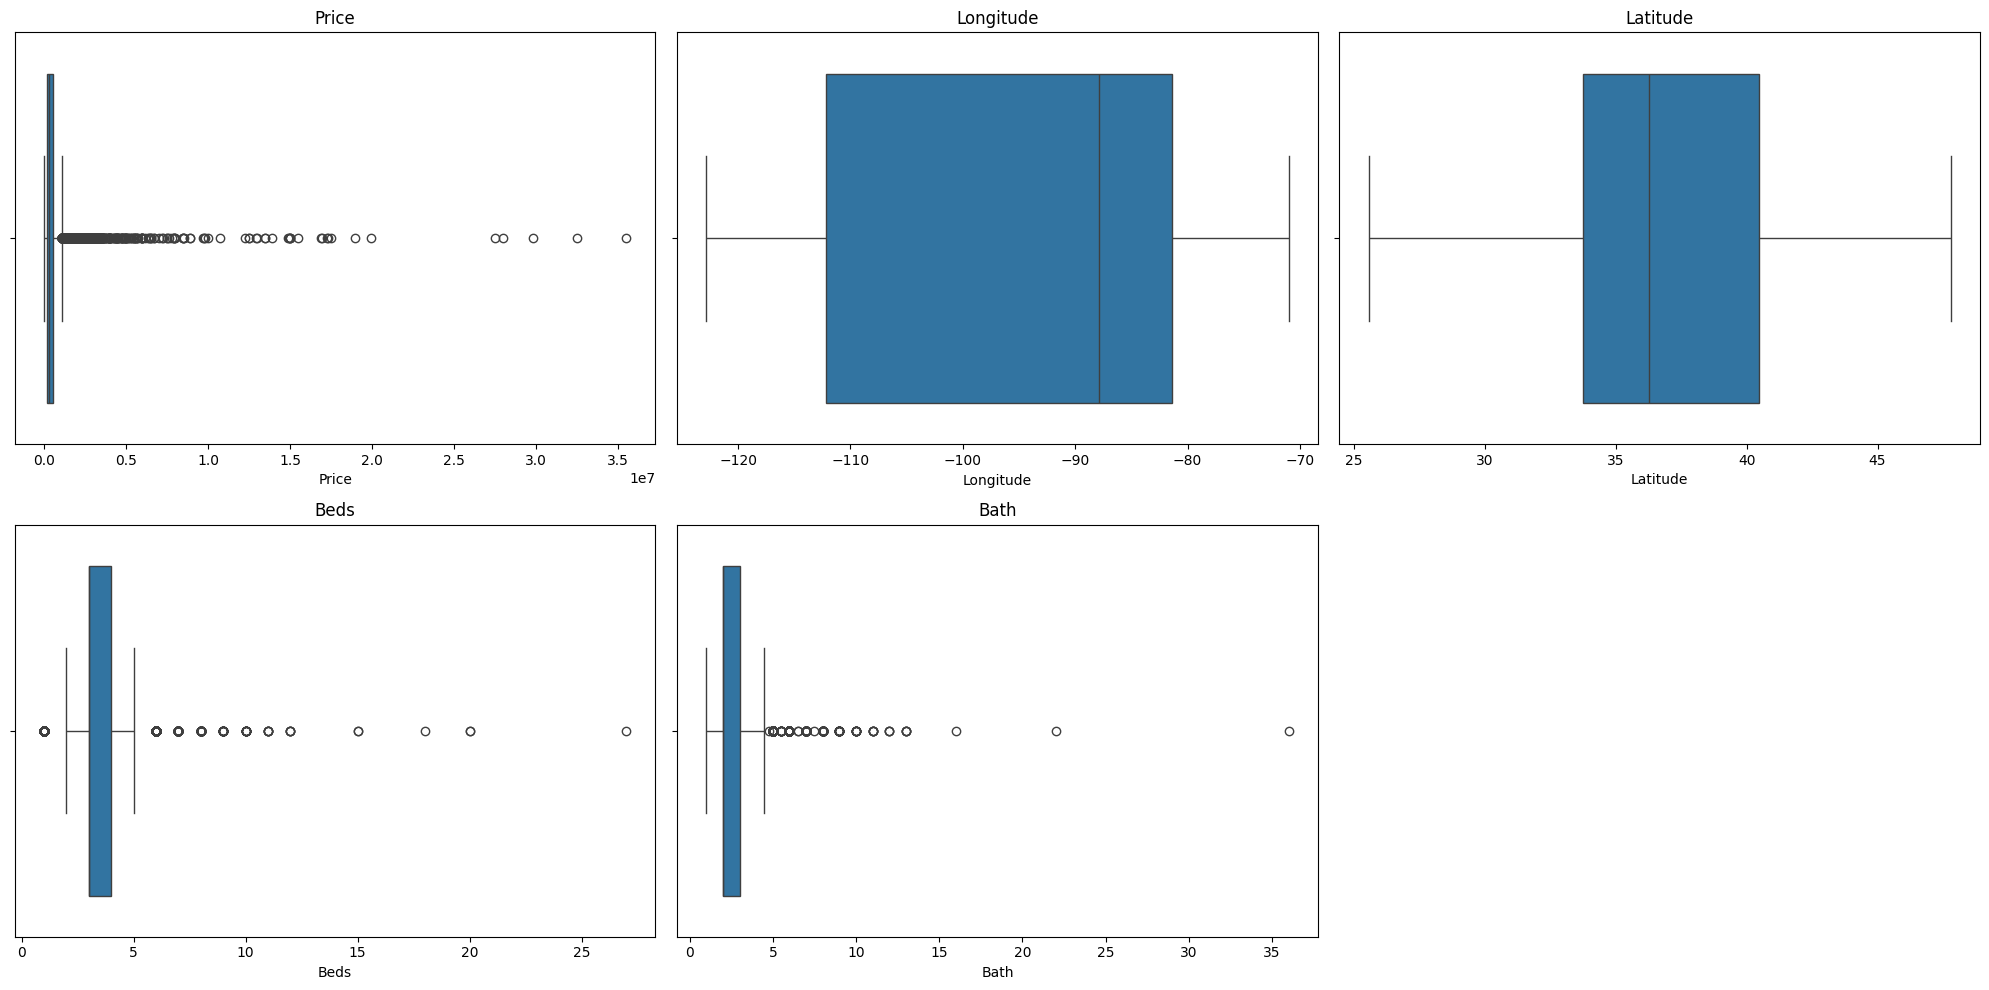

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(data=house, x='Price', ax=axs[0, 0])
axs[0, 0].set_title('Price')

sns.boxplot(data=house, x='Longitude', ax=axs[0, 1])
axs[0, 1].set_title('Longitude')

sns.boxplot(data=house, x='Latitude', ax=axs[0, 2])
axs[0, 2].set_title('Latitude')

sns.boxplot(data=house, x='Beds', ax=axs[1, 0])
axs[1, 0].set_title('Beds')

sns.boxplot(data=house, x='Bath', ax=axs[1, 1])
axs[1, 1].set_title('Bath')

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

This code creates a 2x3 grid of boxplots to visualize the distributions of Price, Longitude, Latitude, Beds, and Bath in the house dataset, allowing for quick identification of each variable’s spread and potential outliers.

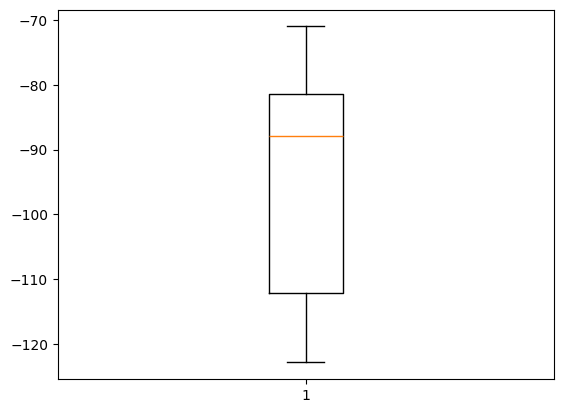

In [16]:
plt.boxplot(house['Longitude'])
Q1 = house['Longitude'].quantile(0.25)
Q3 = house['Longitude'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
housenew = house[(house['Longitude'] >= Q1 - 1.5 * IQR) & (house['Longitude'] <= Q3 + 1.5 * IQR)]


This code plots a boxplot of the Longitude column to visually inspect the distribution and potential outliers, then calculates the Interquartile Range (IQR) for Longitude to filter out outliers.

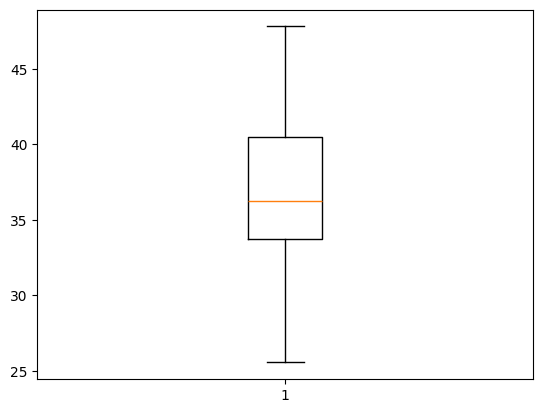

In [17]:
plt.boxplot(house['Latitude'])
Q1 = house['Latitude'].quantile(0.25)
Q3 = house['Longitude'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
housenew = house[(house['Latitude'] >= Q1 - 1.5 * IQR) & (house['Latitude'] <= Q3 + 1.5 * IQR)]

This code plots a boxplot of the Latitude column to visually inspect the distribution and potential outliers, then calculates the Interquartile Range (IQR) for Latitude to filter out outliers.

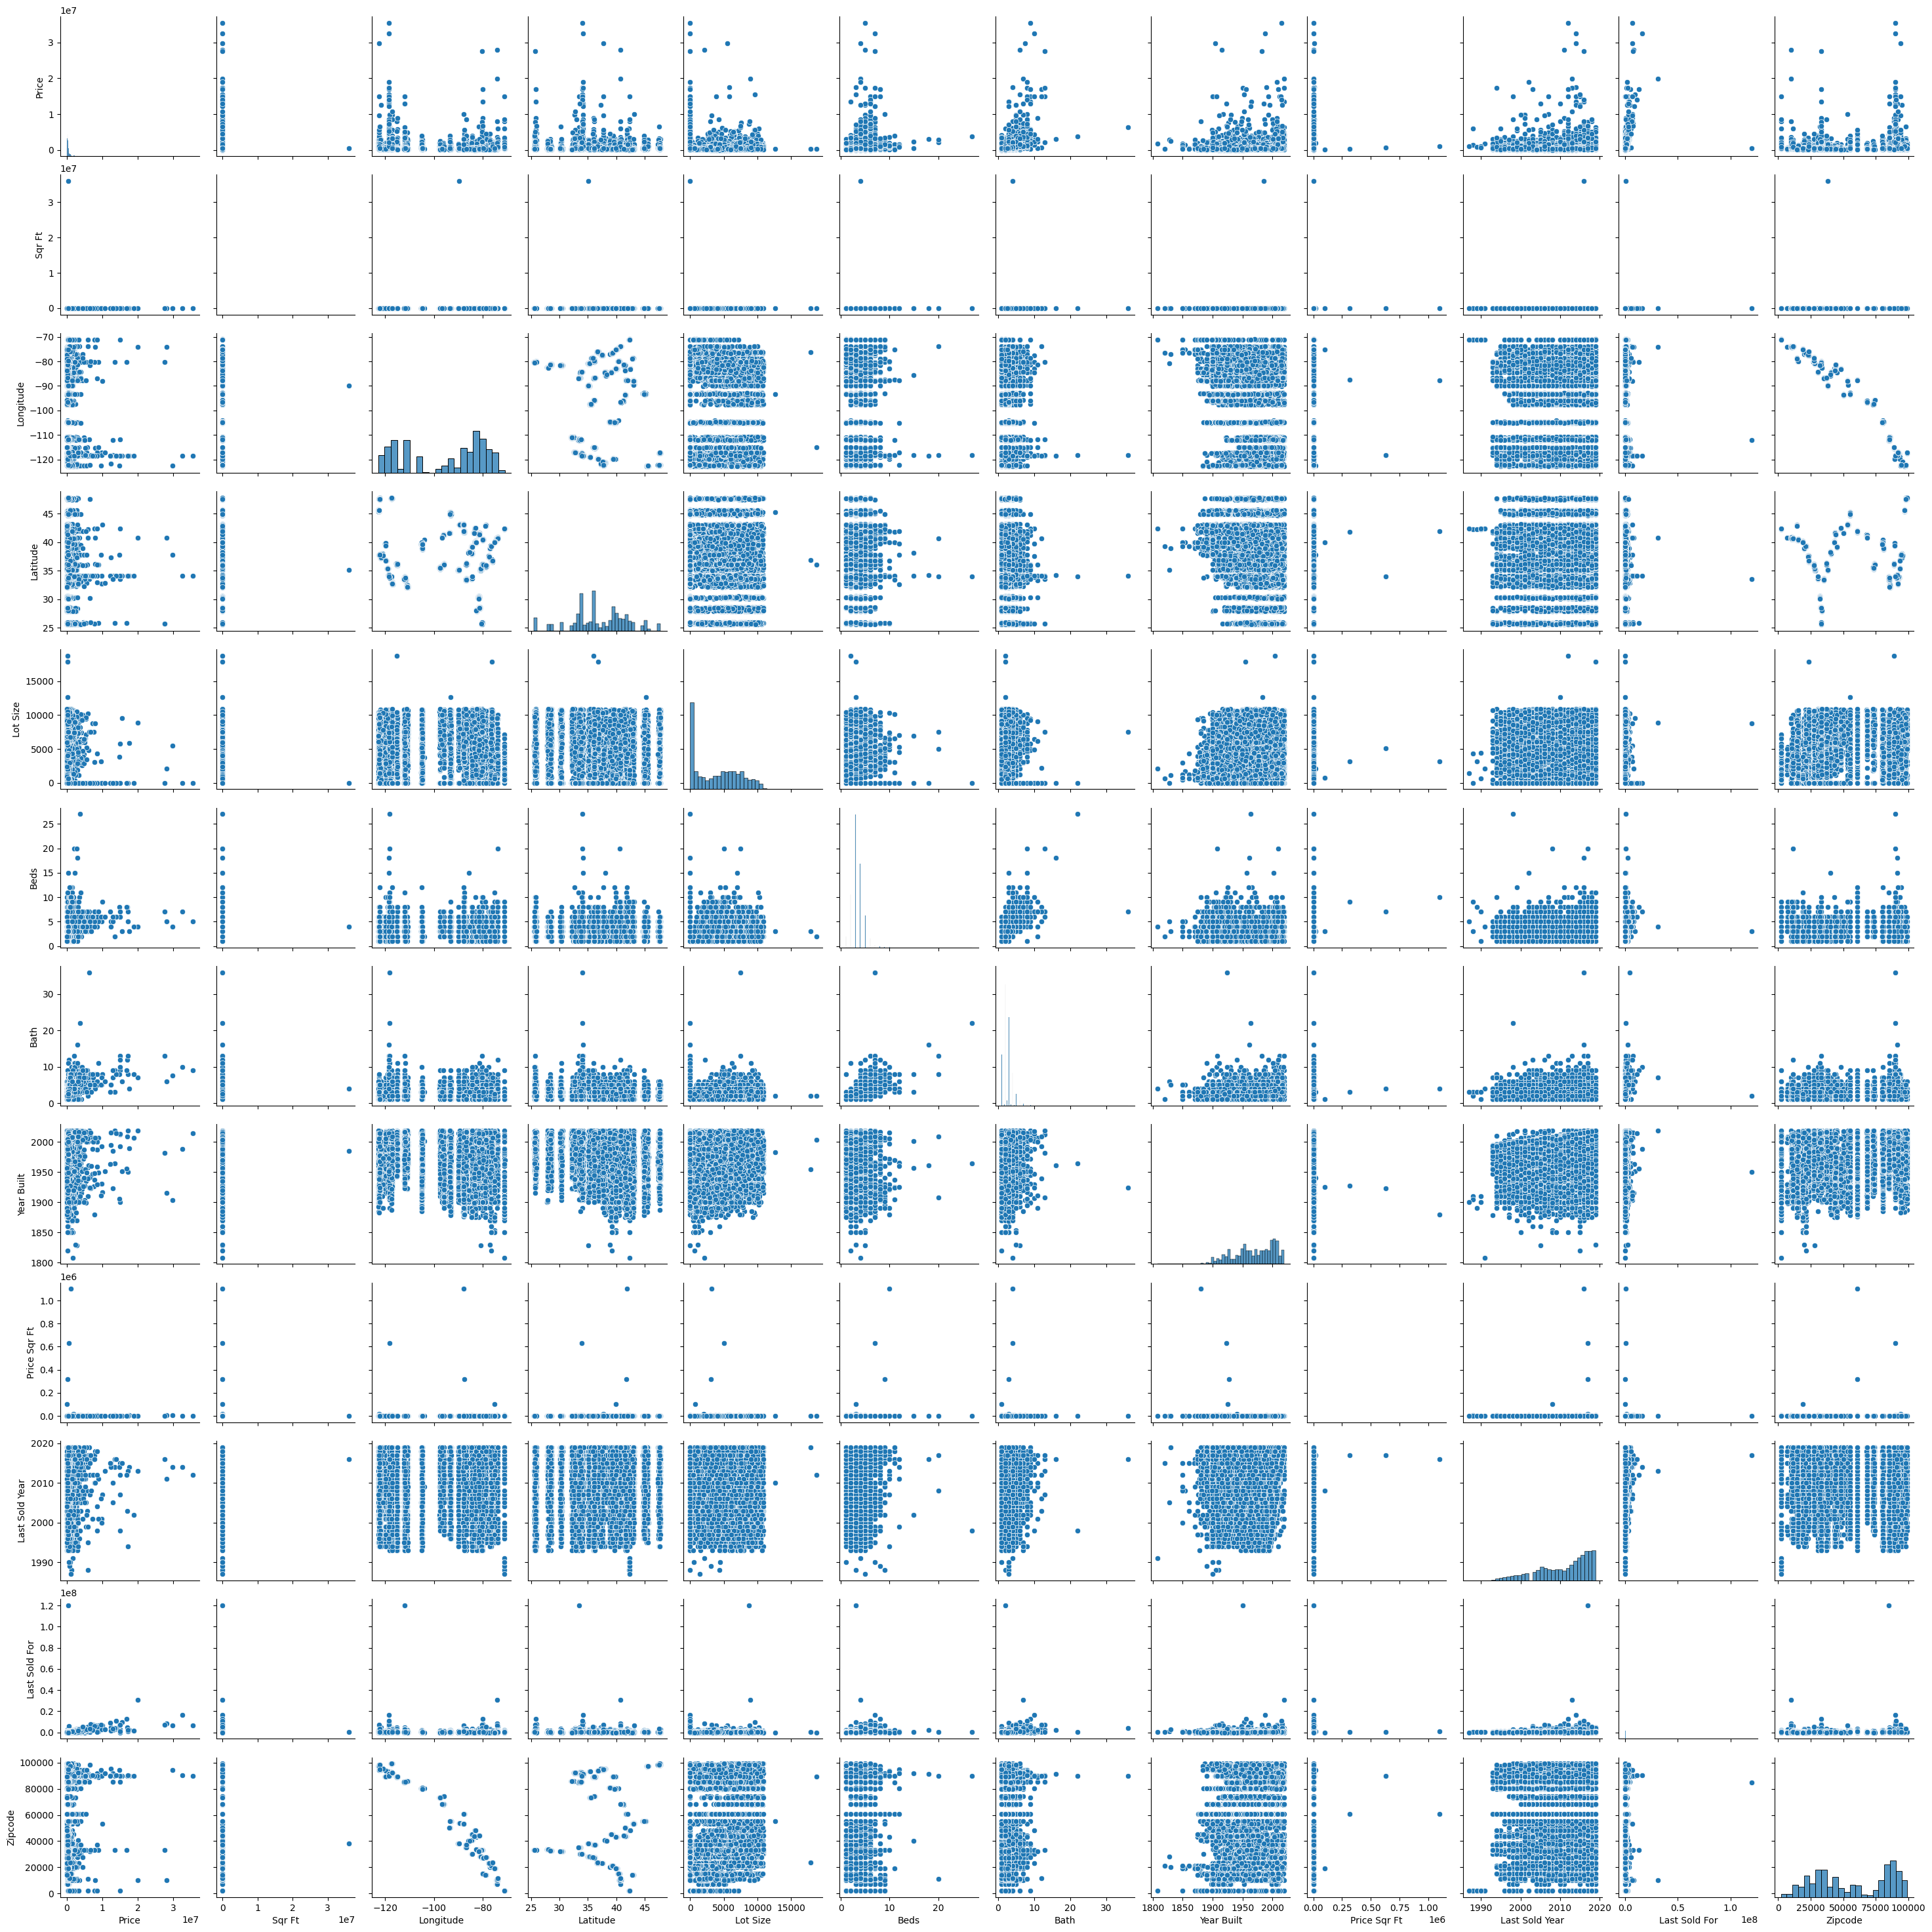

In [18]:
sns.pairplot(house)
plt.show()

The  function generates a grid of scatter plots for each pair of numerical columns in the house dataset, with histograms (or KDE plots) along the diagonal to show individual distributions
This visualization allows you to quickly explore potential relationships, correlations, or patterns between different variables, as well as to spot clusters or outliers.

In [19]:
house.columns

Index(['Price', 'Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath',
       'Year Built', 'Price Sqr Ft', 'Last Sold Year', 'Last Sold For',
       'Address', 'City', 'State', 'Zipcode', 'Address Full'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
housing = house[['Price', 'Beds', 'Bath', 'Longitude', 'Latitude','Lot Size','Last Sold For','Price Sqr Ft','Sqr Ft',]]


In [21]:
X = housing[['Beds', 'Bath', 'Longitude', 'Latitude','Lot Size','Last Sold For','Price Sqr Ft','Sqr Ft']].dropna()
y = housing['Price']

In [22]:
print(X.shape)  # Check the shape of X
print(y.shape)  # Check the shape of y

(12421, 8)
(12421,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 489034942312.202
Mean Absolute Error: 345354.4295104342
Root Mean Squared Error: 699310.3333372116
R-squared: 0.4266101270054554


 evaluates the performance of a linear regression model (lm) by calculating several key regression metrics on the predictions (y_pred) made on the test data (X_test).

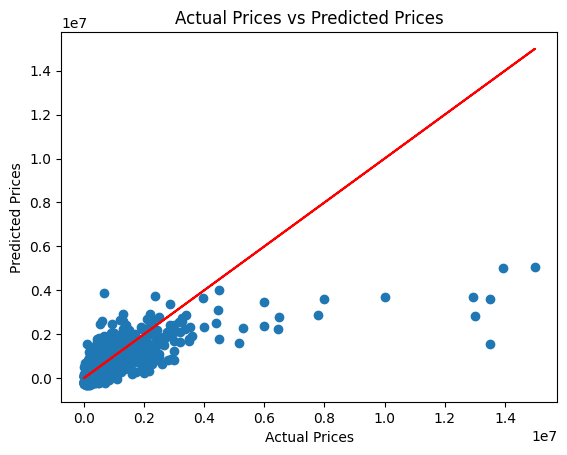

In [26]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

x = housing[['Price', 'Beds', 'Bath', 'Longitude', 'Latitude','Lot Size','Last Sold For','Price Sqr Ft','Sqr Ft']]
Scalers = StandardScaler()
price_Scalers = Scalers.fit_transform(x)

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(price_Scalers)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

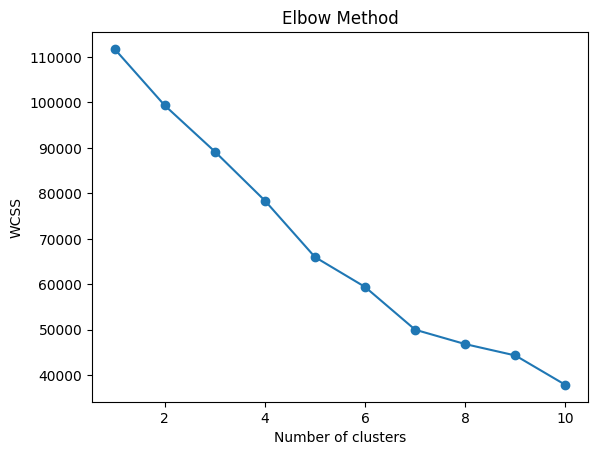

In [29]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

This code calculates the Within-Cluster Sum of Squares (WCSS) for different values of k (number of clusters) to help determine the optimal number of clusters for a K-Means clustering model

In [30]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
housing['Cluster'] = kmeans.fit_predict(price_Scalers)

This code performs K-Means clustering on the price_Scalers data and assigns each data point to a cluster in the housing DataFrame

In [31]:
X = housing[['Beds', 'Bath', 'Longitude', 'Latitude','Lot Size','Last Sold For','Price Sqr Ft','Sqr Ft']]
y = housing['Cluster']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Classifier =  RandomForestClassifier(n_estimators=100)
Classifier.fit(X_train, y_train)


RandomForestClassifier()

In [34]:
y_pred = Classifier.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1039
           1       0.95      0.90      0.93       304
           2       0.97      0.98      0.98      1142

    accuracy                           0.97      2485
   macro avg       0.97      0.96      0.96      2485
weighted avg       0.97      0.97      0.97      2485



In [36]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
housing['Cluster'] = kmeans.fit_predict(housing)

In [37]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[ 4.95926722e+05  3.37568748e+00  2.58154319e+00 -9.55424014e+01
   3.70173473e+01  3.99627398e+03  3.15246910e+05  4.11291006e+02
   5.00070479e+03  1.05111614e+00]
 [ 1.26536924e+07  5.46428571e+00  7.70535714e+00 -1.07572898e+02
   3.46126078e+01  1.83062000e+03  5.11551512e+06  1.84510714e+03
   8.38519643e+03  1.00000000e+00]
 [ 5.40000000e+05  3.00000000e+00  2.00000000e+00 -1.12033676e+02
   3.34977800e+01  8.73400000e+03  1.20000000e+08  2.65000000e+02
   2.03400000e+03  1.00000000e+00]]


The code extracts the coordinates of the centroids of each cluster formed by the K-Means algorithm

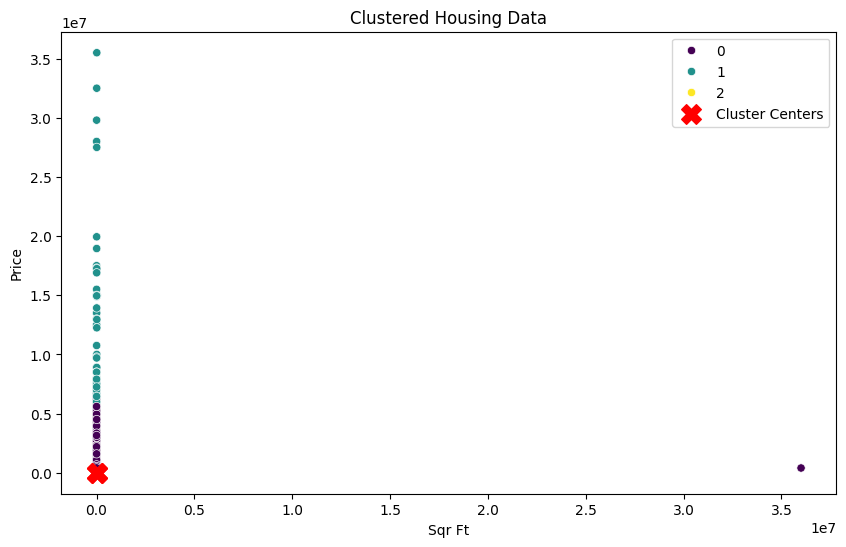

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sqr Ft', y='Price', hue='Cluster', data=housing, palette='viridis')
plt.scatter(cluster_centers[:, 2], cluster_centers[:, 3], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Clustered Housing Data')
plt.xlabel('Sqr Ft')
plt.ylabel('Price')
plt.legend()
plt.show()


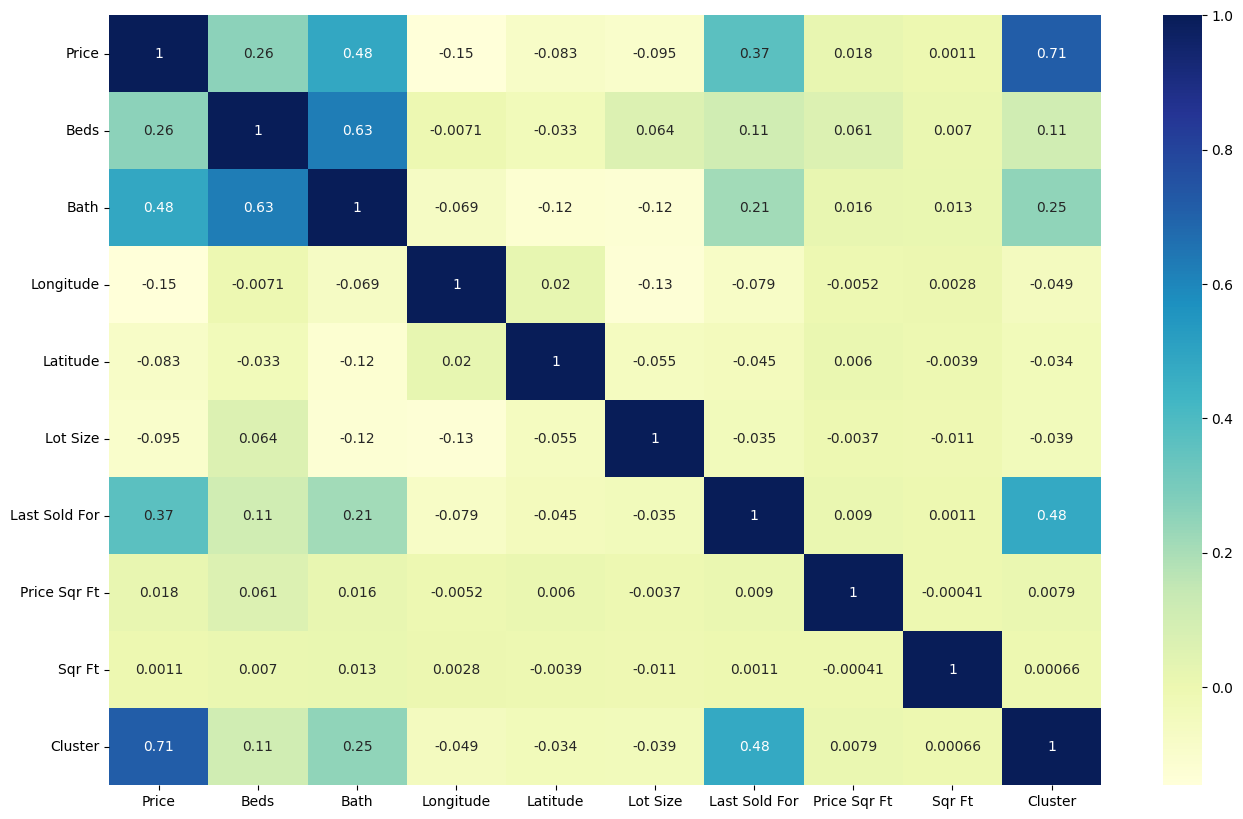

In [39]:
df_train= housing.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

This code generates a heatmap to visualize the correlation matrix of the numeric columns in the df_train DataFrame

The provided code converts data in the 'housing' DataFrame to numeric types using pd.to_numeric, creating a new DataFrame called 'df_train'. It then calculates the correlation matrix between all numeric columns in 'df_train' using df_train.corr(). Finally, it visualizes this correlation matrix as a heatmap using Seaborn's sns.heatmap() function, displaying the correlations with annotations and a color map for easier interpretation. This visualization helps identify feature relationships, potential multicollinearity issues, and provides insights for feature selection in your dataset.

In [40]:
# Optionally, handle NaN values if there are any (e.g., impute with column mean)
df_train.fillna(df_train.mean(), inplace=True)

# Check the result
print(df_train.head())

        Price  Beds  Bath   Longitude   Latitude  Lot Size  Last Sold For  \
3    959000.0   3.0   2.0  -73.860170  40.722960   2598.00       532000.0   
5   1295000.0   4.0   4.0 -111.943670  33.494385      0.55       925000.0   
6    235288.0   3.0   3.0  -93.208090  44.719494      0.27       236500.0   
12   238956.0   5.0   3.0 -119.069890  35.275806   6534.00       256500.0   
14   369000.0   3.0   2.0 -118.163666  33.857777      1.89        56000.0   

    Price Sqr Ft  Sqr Ft  Cluster  
3          677.0  1417.0        0  
5          340.0  3814.0        0  
6          112.0  2104.0        0  
12         126.0  1898.0        0  
14         345.0  1069.0        0  


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [42]:
y_train = df_train.pop('Price Sqr Ft',)
X_train = df_train

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
rfe = RFE(lm, n_features_to_select=6)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Price', False, 2),
 ('Beds', True, 1),
 ('Bath', True, 1),
 ('Longitude', True, 1),
 ('Latitude', True, 1),
 ('Lot Size', True, 1),
 ('Last Sold For', False, 3),
 ('Sqr Ft', False, 4),
 ('Cluster', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['Beds', 'Bath', 'Longitude', 'Latitude', 'Lot Size', 'Cluster'], dtype='object')

In [48]:
X_train_rfe = X_train[col]

In [49]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Price Sqr Ft   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.33
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.92e-11
Time:                        20:04:38   Log-Likelihood:            -1.3401e+05
No. Observations:               12421   AIC:                         2.680e+05
Df Residuals:                   12414   BIC:                         2.681e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2140.1598   1075.963     -1.989      0.0

The OLS Regression Results indicate a poor model fit with an R-squared of 0.005, meaning the model explains only 0.5% of the variance in "Price Sqr Ft". Although statistically significant, the model's low predictive power suggests the need for feature engineering, exploring alternative regression models, further data exploration, and incorporating domain knowledge to improve its accuracy and usefulness in predicting "Price Sqr Ft".

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,104.44
2,Bath,1.87
1,Beds,1.73
5,Lot Size,1.08
6,Cluster,1.07
3,Longitude,1.03
4,Latitude,1.02


In [54]:
y_train_price = lm.predict(X_train_rfe)

In [55]:
res = (y_train_price - y_train)

In [56]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

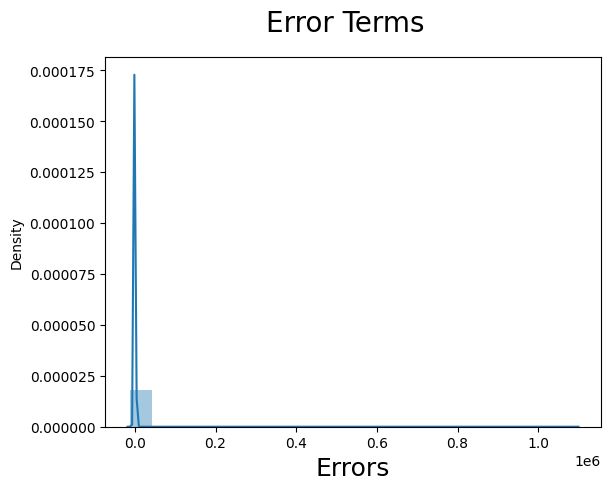

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label


he graph, created using sns.distplot(), visualizes the distribution of errors (residuals) in your model. It plots a histogram of the differences between the actual target values (y_train) and the predicted target values (y_train_price), divided into 20 bins. This visualization helps assess the model's performance by showing how frequently different error magnitudes occur, ideally revealing a normal distribution centered around zero, which would indicate that errors are random and unbiased. The title and x-axis label further clarify the graph's purpose and interpretation.

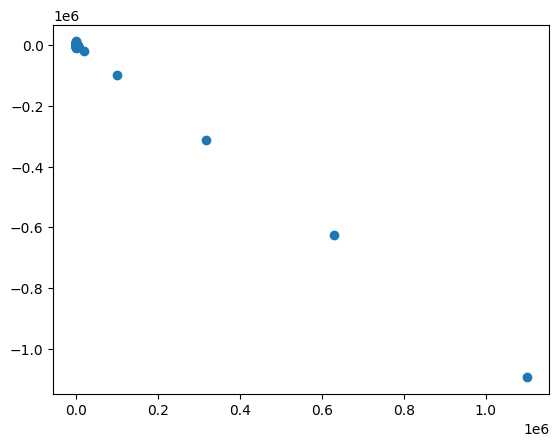

In [58]:
plt.scatter(y_train,res)
plt.show()

The code plt.scatter(y_train, res) creates a scatter plot that visualizes the relationship between the actual target values (y_train) and the model's residuals (res). Each point on the plot represents a data point, with its x-coordinate corresponding to the actual target value and its y-coordinate corresponding to the prediction error (residual). This visualization helps assess the model's performance by revealing patterns in the residuals, ideally showing a random scatter of points around the horizontal axis (zero residual), indicating that errors are not systematically related to the target values. Any clear trends or patterns in the scatter plot could suggest issues with the model's assumptions or potential areas for improvement.

# Futher improvement model performance

1. Neighborhood/School District: Housing prices are often heavily influenced by the neighborhood or school district. Including this information as a categorical feature could significantly improve the model's accuracy.

2. Property Type: Different property types (e.g., single-family home, condo, townhouse) have varying price ranges. Including this information would help the model capture these differences.

3. Year Built: The age of a house can impact its price. Including the year built or age as a feature could improve the model's performance.

4. Amenities: Features like a swimming pool, garage, central air conditioning, fireplace, etc., can significantly influence a house's value. Including these as binary features could enhance the model.

5. Local Economic Indicators: Factors like unemployment rate, median income, and job growth in the area can affect housing prices. Incorporating these data points could enhance the model's predictive power.

6. Crime Rates: Safety and security are crucial factors for homebuyers. Including crime rate data for the neighborhood could improve the model's accuracy.

7. Walkability Score: This metric reflects how easy it is to walk to amenities like shops, restaurants, and parks from a given location. Higher walkability scores often correlate with higher property values.

8. Proximity to Public Transportation: Easy access to public transportation is desirable for many homebuyers and can impact property prices.


In [59]:
data = {
    'Price': [100000, 200000, 150000, 250000, 180000],
    'Beds': [2, 3, 2, 4, 3],
    'Bath': [1, 2, 1, 2, 2],
    'Longitude': [-122.0, -122.1, -122.2, -122.3, -122.4],
    'Latitude': [37.0, 37.1, 37.2, 37.3, 37.4],
    'Lot Size': [5000, 6000, 4500, 7000, 5500],
    'Last Sold For': [80000, 150000, 120000, 200000, 160000],
    'Sqr Ft': [1000, 1500, 1200, 1800, 1400],
    'Neighborhood': ['A', 'B', 'A', 'C', 'B']  # Assuming 'Neighborhood' column exists
}
house = pd.DataFrame(data)

# 1. One-Hot Encoding for 'Neighborhood'
house = pd.get_dummies(house, columns=['Neighborhood'], prefix=['Neighborhood'])

# 2. Feature Selection
features = ['Beds', 'Bath', 'Longitude', 'Latitude', 'Lot Size', 'Last Sold For', 'Sqr Ft'] + [col for col in house.columns if col.startswith('Neighborhood_')]

# 3. Train-Test Split
X = house[features]
y = house['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

The code creates a linear regression model to predict house prices based on features like the number of beds, baths, location, lot size, and last sold price. It first prepares the data by one-hot encoding the 'Neighborhood' feature and selecting relevant columns. Then, it splits the data into training and testing sets, trains a linear regression model on the training data, and uses the trained model to predict prices for the test data. Finally, it evaluates the model's performance by calculating the R-squared value, which indicates how well the model's predictions match the actual prices.